#Prediksi Harga Saham Menggunakan ARIMA

#Mengimport library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

Pergerakan harga saham Telkom

- Open adalah harga pembukaan saham pada saat transaksi dimulai dalam suatu periode transaksi. Biasanya, harga pembukaan sama dengan harga penutupan transaksi hari sebelumnya.

- High menunjukkan harga tertinggi yang pernah terjadi dalam suatu periode perdagangan.

- Low menunjukkan harga terendah yang pernah terjadi dalam suatu periode perdagangan.

- Close menunjukkan harga penutupan suatu saham dalam satu hari perdagangan.

- Adj. Close adalah harga penutupan saham yang sudah disesuaikan (adjusted closing price)

#Memanggil dataset

In [ ]:
data = pd.read_csv("telkom.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0


In [ ]:
data = pd.read_csv("telkom.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


In [ ]:
#Menampilkan 10 baris teratas dari dataset
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
5,2017-01-09,4000.0,4030.0,3990.0,4020.0,3343.399414,85713200.0
6,2017-01-10,4030.0,4030.0,3960.0,4000.0,3326.765381,44608000.0
7,2017-01-11,3960.0,4000.0,3950.0,3960.0,3293.497559,47226300.0
8,2017-01-12,3920.0,3970.0,3920.0,3960.0,3293.497559,45738500.0
9,2017-01-13,3930.0,3970.0,3930.0,3950.0,3285.180664,64704600.0


In [ ]:
#Menampilkan ukuran dimensi dari dataset
data.shape

(1422, 7)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
#Mengetahui adanya data yang duplikat
data.duplicated().sum()

0

In [ ]:
data.fillna(method='ffill', inplace=True)

In [ ]:
#Mengetahui data yang bernilai kosong
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#Mengetahui informasi umum dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1422 non-null   object 
 1   Open       1422 non-null   float64
 2   High       1422 non-null   float64
 3   Low        1422 non-null   float64
 4   Close      1422 non-null   float64
 5   Adj Close  1422 non-null   float64
 6   Volume     1422 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.9+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1.422000e+03
mean,3827.784810,3869.191280,3785.682138,3827.278481,3416.331273,1.020808e+08
std,490.279274,487.142041,492.305244,492.212949,462.456994,6.627855e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,2289.641846,0.000000e+00
25%,3452.500000,3490.000000,3400.000000,3450.000000,3111.957031,6.168310e+07
50%,3870.000000,3900.000000,3840.000000,3870.000000,3358.973633,8.722480e+07
75%,4190.000000,4220.000000,4150.000000,4190.000000,3708.230957,1.233851e+08
max,4850.000000,4850.000000,4780.000000,4800.000000,4750.000000,6.241426e+08


In [ ]:
data.nunique()

Date         1422
Open          213
High          215
Low           215
Close         212
Adj Close     560
Volume       1361
dtype: int64

In [ ]:
# Menghapus variabel yang tidak digunakan
data = data.drop(['Open','High','Low','Adj Close','Volume'],axis='columns')

In [ ]:
print(data.dtypes)

Date      object
Close    float64
dtype: object


In [ ]:
data

,Date,Close
0,2017-01-02,3980.0
1,2017-01-03,3950.0
2,2017-01-04,3950.0
3,2017-01-05,3950.0
4,2017-01-06,4000.0
...,...,...
1417,2022-08-26,4490.0
1418,2022-08-29,4520.0
1419,2022-08-30,4480.0
1420,2022-08-31,4560.0


In [ ]:
#Mengubah tanggal menjadi index
con = data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1422, freq=None)

In [ ]:
data

,Close
Date,
2017-01-02,3980.0
2017-01-03,3950.0
2017-01-04,3950.0
2017-01-05,3950.0
2017-01-06,4000.0
...,...
2022-08-26,4490.0
2022-08-29,4520.0
2022-08-30,4480.0


In [ ]:
#Menginisialkan variabel Close sebagai data time series
ts = data['Close']
ts.head(10)

Date
2017-01-02    3980.0
2017-01-03    3950.0
2017-01-04    3950.0
2017-01-05    3950.0
2017-01-06    4000.0
2017-01-09    4020.0
2017-01-10    4000.0
2017-01-11    3960.0
2017-01-12    3960.0
2017-01-13    3950.0
Name: Close, dtype: float64

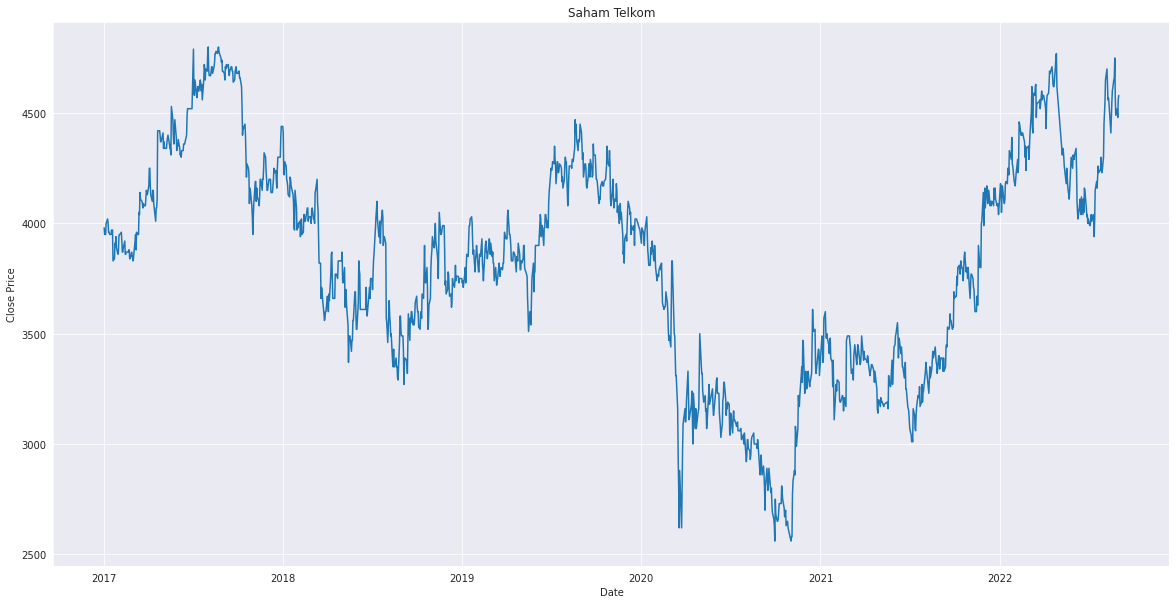

In [ ]:
    #Visualisasi dataset
    plt.figure(figsize=(20,10))
    sns.set_style('darkgrid')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Saham Telkom')
    plt.plot(data['Close'])

# Uji Stasioneritas Data

In [ ]:
#Deklarasi fungsi untuk mengecek stasioneritas data
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

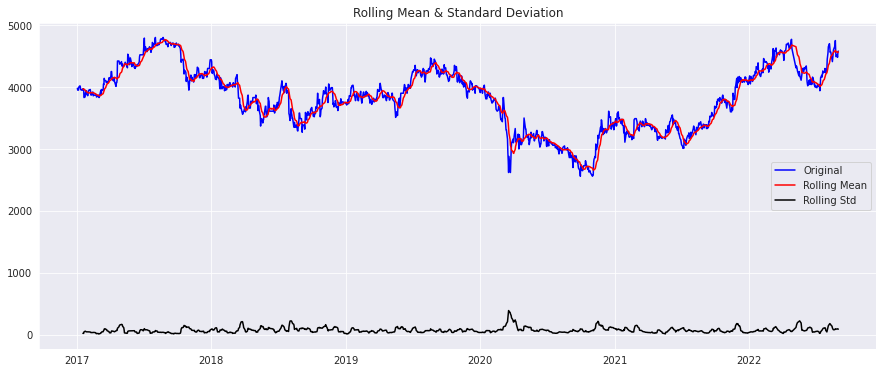

Results of Dickey-Fuller Test:
Test Statistic                   -1.889725
p-value                           0.336910
#Lags Used                        2.000000
Number of Observations Used    1419.000000
Critical Value (1%)              -3.434967
Critical Value (5%)              -2.863579
Critical Value (10%)             -2.567856
dtype: float64


In [ ]:
#Melakukan uji stasioneritas untuk dataset
test_stationarity(ts)

Diperoleh nilai p-value > 0,05, maka H0 tidak ditolak.

Jadi, data memiliki keadaan yang tidak stasioner. Agar data stasioner maka dilakukan differencing.

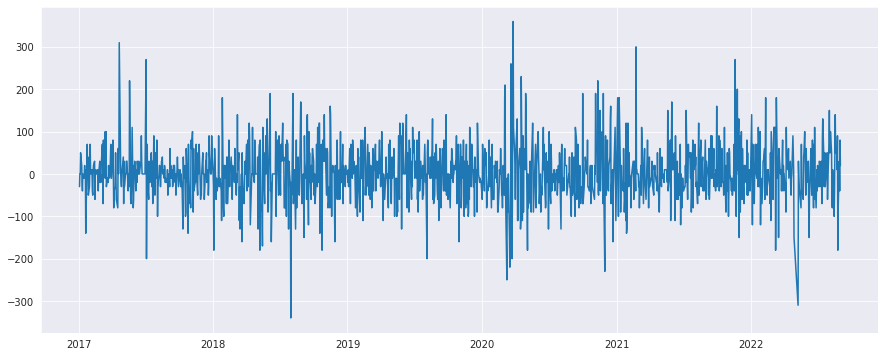

In [ ]:
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

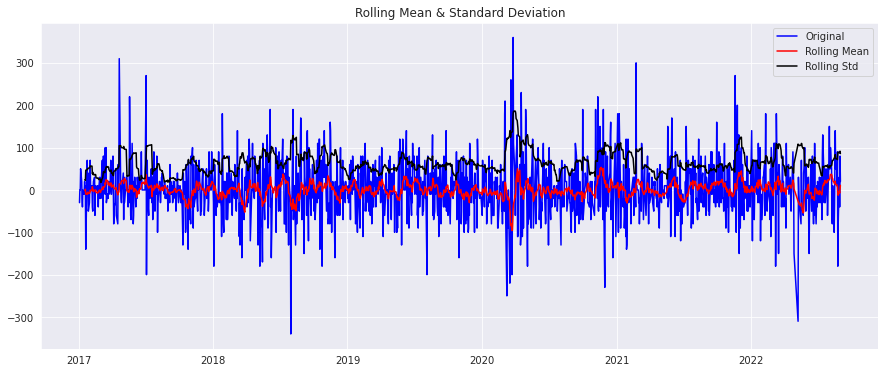

Results of Dickey-Fuller Test:
Test Statistic                  -31.251373
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1419.000000
Critical Value (1%)              -3.434967
Critical Value (5%)              -2.863579
Critical Value (10%)             -2.567856
dtype: float64


In [ ]:
test_stationarity(ts_diff_1)

Setelah dilakukan differencing data menjadi stasioner

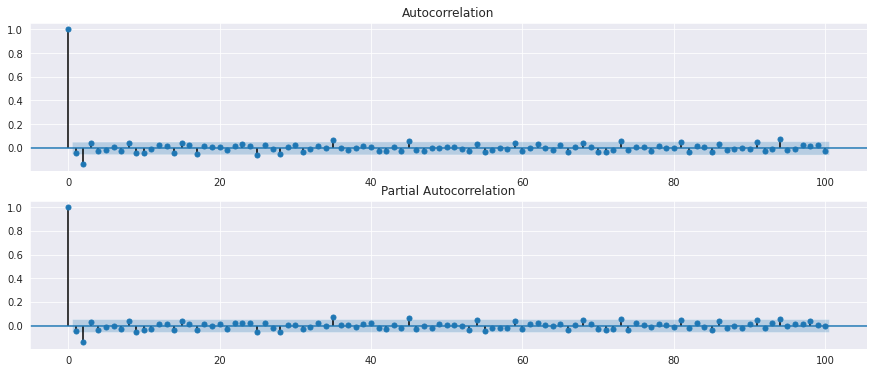

In [ ]:
plt.figure()
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=100)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=100)
plt.show()

In [ ]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=495.792
ARIMA(0, 0, 1) RMSE=272.951
ARIMA(0, 0, 2) RMSE=179.132
ARIMA(0, 1, 0) RMSE=68.279
ARIMA(0, 1, 1) RMSE=68.084
ARIMA(0, 1, 2) RMSE=67.290
ARIMA(0, 2, 0) RMSE=101.210
ARIMA(0, 2, 1) RMSE=68.333
ARIMA(0, 2, 2) RMSE=68.142
ARIMA(1, 0, 0) RMSE=68.203
ARIMA(1, 0, 1) RMSE=68.048
ARIMA(1, 0, 2) RMSE=67.275
ARIMA(1, 1, 0) RMSE=68.138
ARIMA(1, 1, 1) RMSE=67.723
ARIMA(1, 1, 2) RMSE=67.242
ARIMA(1, 2, 0) RMSE=89.509
ARIMA(2, 0, 0) RMSE=68.091
ARIMA(2, 0, 1) RMSE=67.987
ARIMA(2, 0, 2) RMSE=67.226
ARIMA(2, 1, 0) RMSE=67.219
ARIMA(2, 1, 1) RMSE=67.190
ARIMA(2, 1, 2) RMSE=67.328
ARIMA(2, 2, 0) RMSE=79.164
ARIMA(2, 2, 1) RMSE=67.269
ARIMA(2, 2, 2) RMSE=67.241
Best ARIMA(2, 1, 1) RMSE=67.190


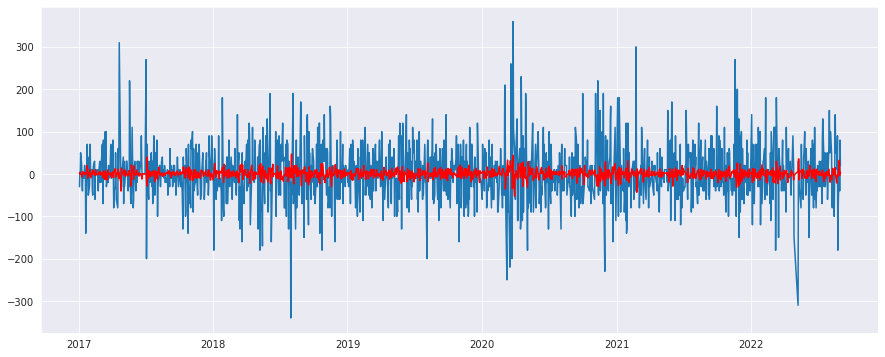

In [ ]:
#Visualisasi perbandingan antara dataset setelah differencing dengan data hasil prediksi ARIMA(2,1,1)
model_ARIMA = ARIMA(ts, order=(2,1,1))
results_ARIMA = model_ARIMA.fit(disp=-1)
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(ts_diff_1)             
plt.plot(predictions_ARIMA, color='red')  

In [ ]:
#Informasi yang diperoleh dari pemodelan ARIMA(2,1,1) pada dataset
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1421
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -7975.126
Method:                       css-mle   S.D. of innovations             66.246
Date:                Sun, 18 Sep 2022   AIC                          15960.252
Time:                        09:02:23   BIC                          15986.547
Sample:                             1   HQIC                         15970.074
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4167      1.531      0.272      0.786      -2.584       3.418
ar.L1.D.Close    -0.3421      0.169     -2.026      0.043      -0.673      -0.011
ar.L2.D.Close    -0.1504      0.026     -5.734      0.000      -0.202      -0.099
ma.L1.D.Close     0.3003      0.171      1.759      0.079      -0.034       0.635
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1374           -2.3141j            2.5785           -0.3227
AR.2           -1.1374           +2.3141j            2.5785            0.3227
MA.1           -3.3298           +0.0000j            3.3298            0.5000
-----------------------------------------------------------------------------
"""

# Prediksi Data

In [ ]:
#Prediksi data dengan model ARIMA(2,1,1) untuk 4 hari ke depan
predict_dif = results_ARIMA.predict(start=1422,end=1425)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_ts = [ts[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data aslinya
  a = pred_ts[i] + j
  pred_ts.append(a)
predict = pd.Series(pred_ts[1:], index=predict_dif.index)
print(predict)

1421    4566.519291
1422    4555.264855
1423    4545.898296
1424    4536.172962
dtype: float64


Diperoleh data dari hasil prediksi:
- 2 September 2022 = 4566.52
- 3 September 2022 = 4555.26
- 4 September 2022 = 4545.9
- 5 September 2022 = 4536.17